In [1]:
from scipy.io import loadmat

In [2]:
data = loadmat('data.mat')

In [3]:
print (data['data']).shape

(1372633, 47)


In [4]:
print data['data'][0].size

47


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
import numpy as np

### First visualisation of all data

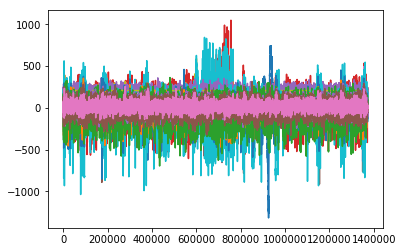

In [7]:
time = np.arange(0, 1372633)
plt.plot(time, data['data'])
plt.show()

### Visualization of raw signal data collected in each channel

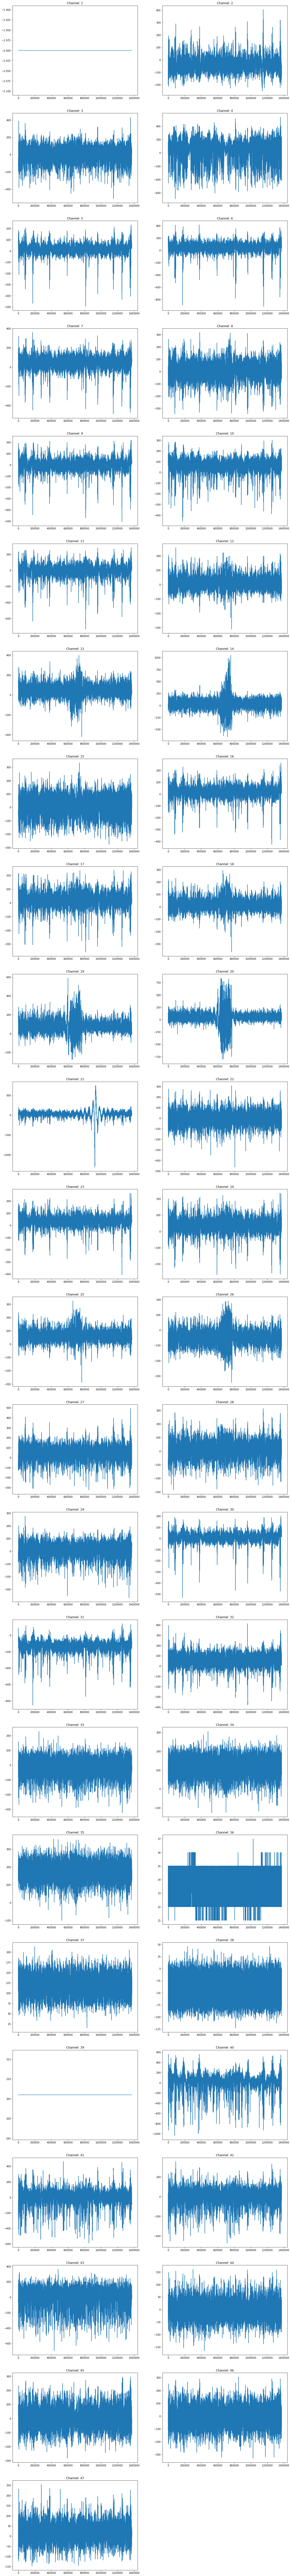

In [8]:
fig = plt.figure(figsize=(20,200))
for c in range(1,48):
    channel = data['data'][:,c-1]
    plt.subplot(25,2,c)
    plt.plot(time, channel)
    plt.title("Channel: " + str(c))

### We observe that channels 14, 19, 20 show clearest anomalies in the data.

In [9]:
best_channels = [14,19,20]

## Helper functions to extract and plot features

In [10]:
### LINE LENGTH
def linelength(second):
    ll = 0
    for i in range(second.size):
        ll += abs(second[i] - second[i-1])
    return ll

### ENERGY
def energy(second):
    energy = 0
    for i in range(second.size):
        energy += second[i]**2
    energy = energy / (second.size)
    return energy

### VARIANCE
def variance(second):
    return second.var()

### SPECTRAL POWER
def extract_band_low(second, sampling_freq=5000):
    fourier = np.fft.fft(second)
    fourier_psd = np.abs(fourier) ** 2
    return np.sum(fourier_psd[12:31]) * 2 / sampling_freq

### SPECTRAL POWER
def extract_band_high(second, sampling_freq=5000):
    fourier = np.fft.fft(second)
    fourier_psd = np.abs(fourier) ** 2
    return np.sum(fourier_psd[100:601]) * 2 / sampling_freq

In [11]:
def features(channel, frequency, function):
    i = 0
    features = []
    while (i < channel.size):
        if (i < channel.size - (channel.size % frequency)):
            # One second of samples
            second = channel[i:i+frequency]
        else:
            second = channel[i:]
        features.append(function(second))
        i = i + frequency
    return features

In [12]:
def plot_features(c):
    """Takes as input c, the channel number. Plots all 5 features."""
    channel = data['data'][:,c-1]
    
    plt.figure(figsize=(20,3))
    plt.plot(channel)
    plt.title("Raw Data for Channel: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, 5000, linelength))
    plt.title("Linelength of Channel: " + str(c))

    plt.figure(figsize=(20,3))
    plt.plot(features(channel, 5000, energy))
    plt.title("Energy of Channel: " + str(c))

    plt.figure(figsize=(20,3))
    plt.plot(features(channel, 5000, variance))
    plt.title("Variance of Channel: " + str(c))

    plt.figure(figsize=(20,3))
    plt.plot(features(channel, 5000, extract_band_low))
    plt.title("Beta Spectral Power of Channel: " + str(c))

    plt.figure(figsize=(20,3))
    plt.plot(features(channel, 5000, extract_band_high))
    plt.title("HFO Spectral Power of Channel: " + str(c))
    return
    

## Final plots of features for each of the chosen channels

#### Channel 14

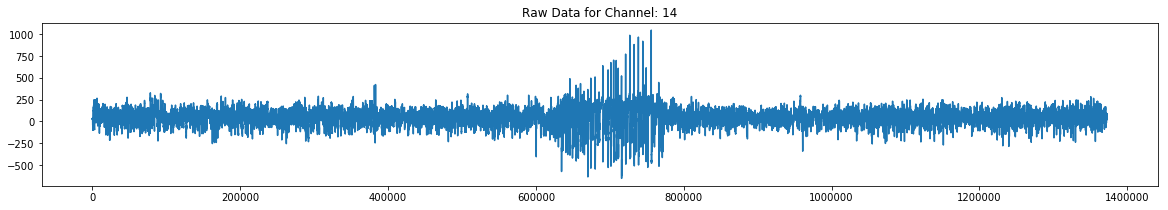

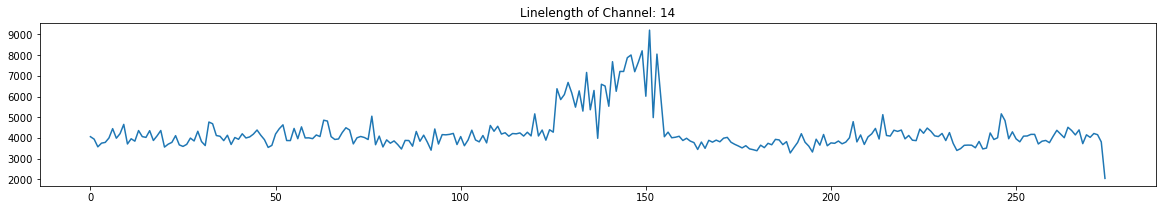

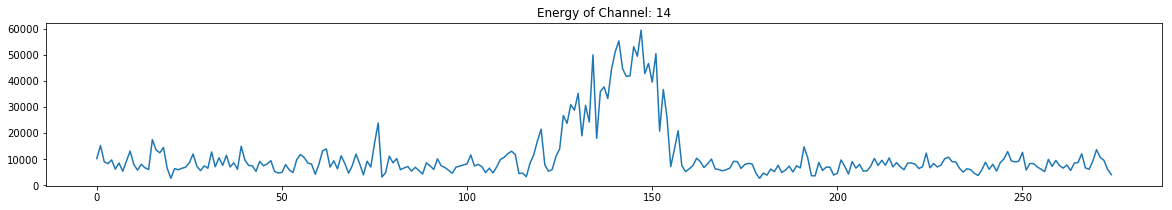

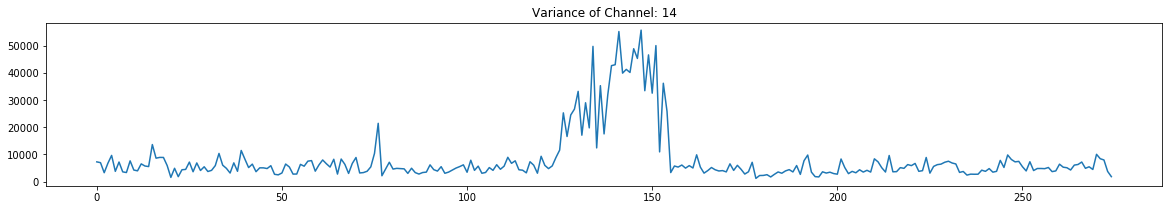

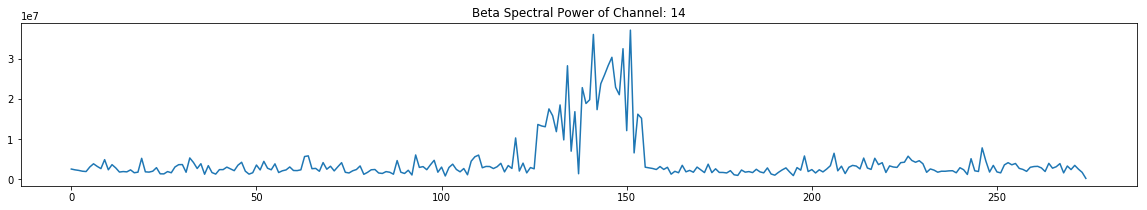

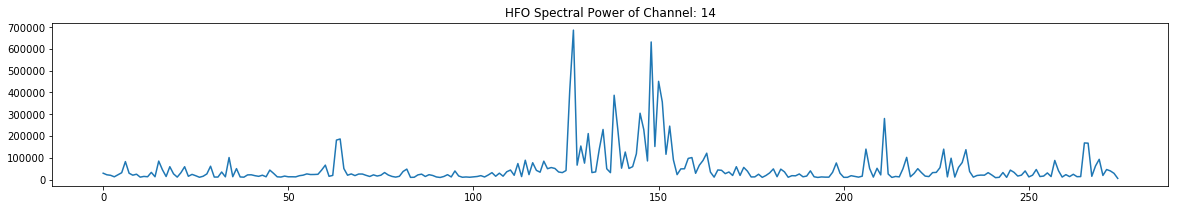

In [13]:
c=14

plot_features(c)

#### Channel 19

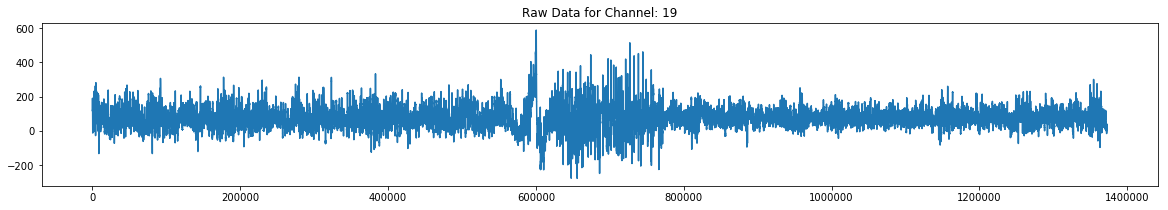

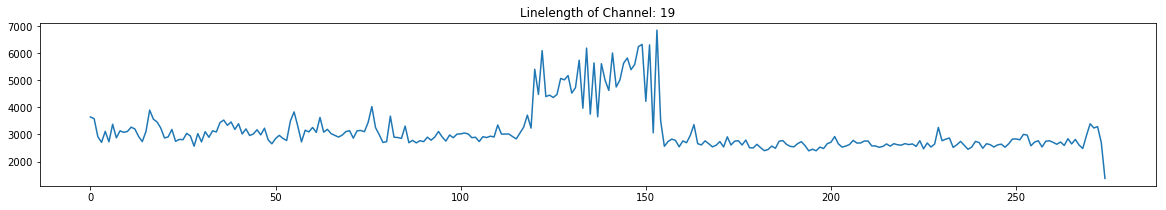

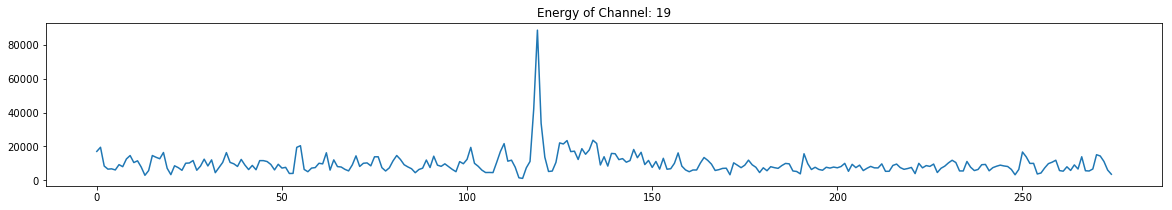

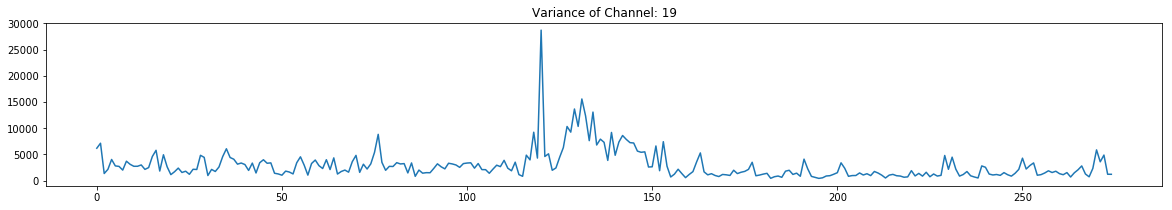

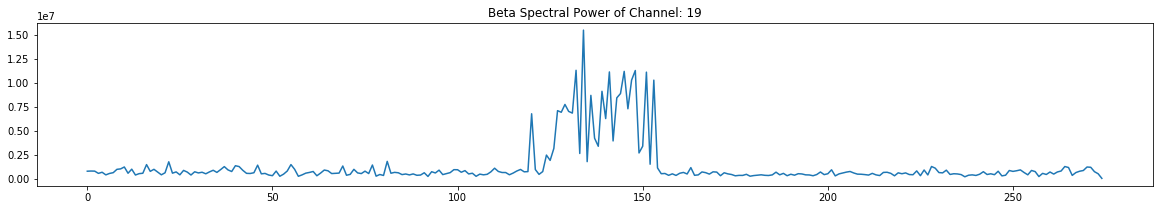

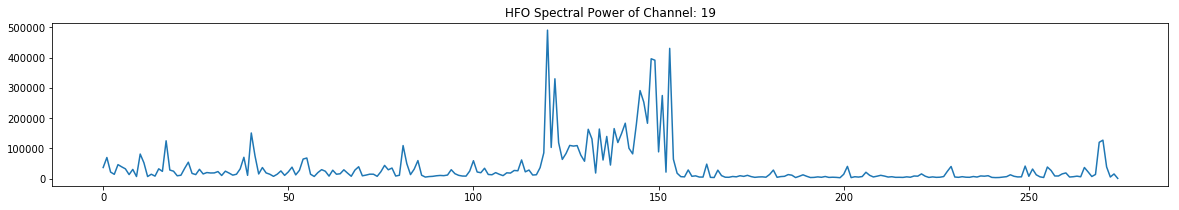

In [14]:
c=19

plot_features(c)

#### Channel 20

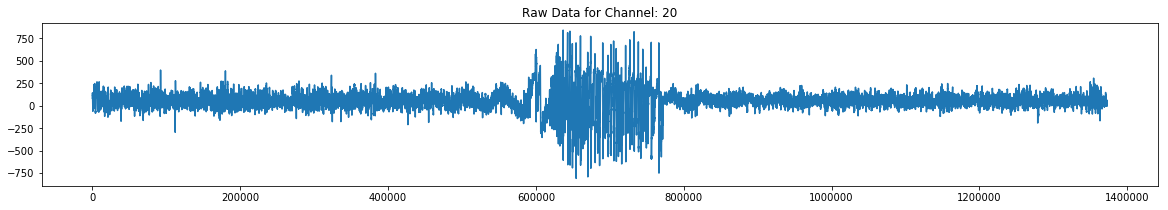

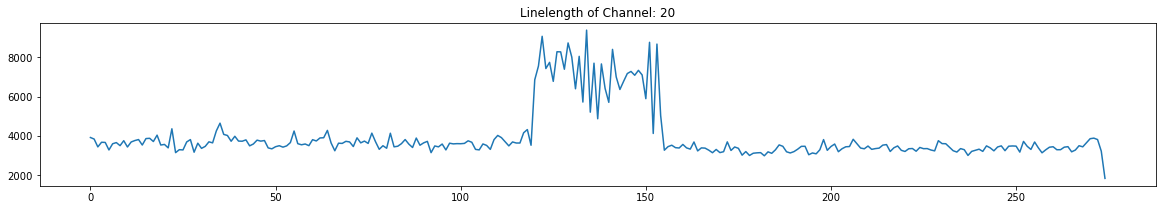

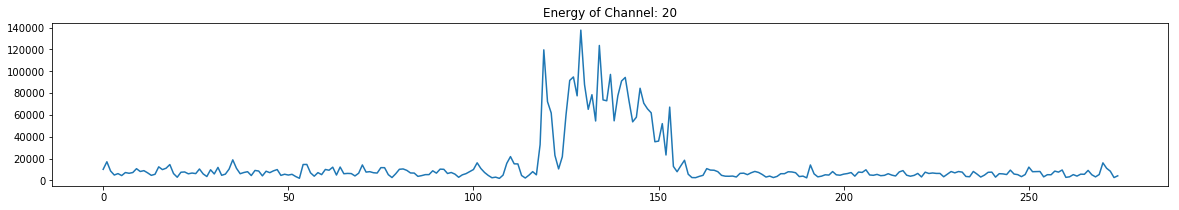

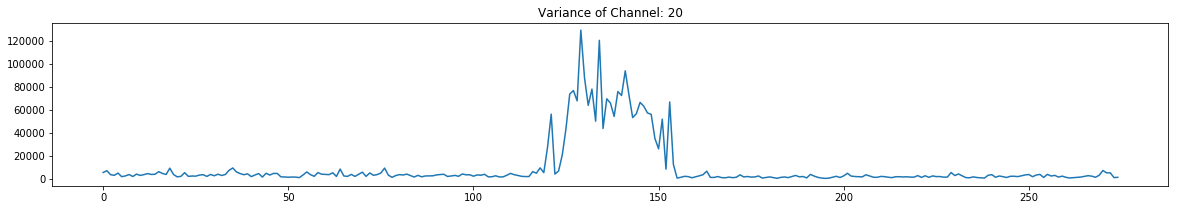

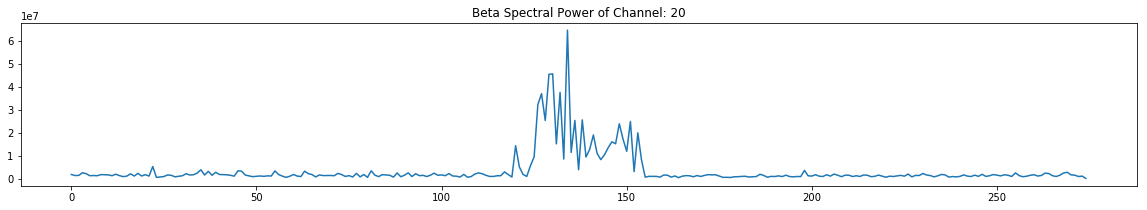

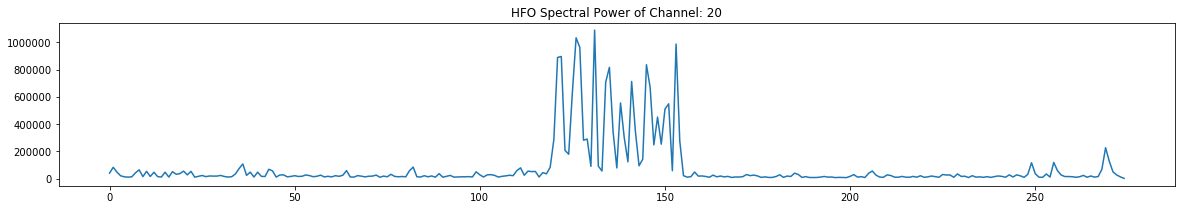

In [15]:
c=20

plot_features(c)

#### We can see that in each of these 3 channels, all 5 extracted features show an anomaly in the data during the seizure duration.